<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Oct 28 01:32:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.1.0+cu118


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# 1. entertainment, games, graphic design
# 2. IT
# 3. medication

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
# when ML model performs well with training data but has poor performance with test data
# or new/unseen data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
# 1. simplifying the model -> remove layers, reduce neuron numbers
# 2. early stopping -> stop before there is an increase i generalization error
# 3. data augmentation -> increase size of the data -> rotate, flip, change brightness etc.,

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
#

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [8]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13659882.46it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 195758.11it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3777303.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 20160856.20it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [9]:
img, label = train_data[0]

In [10]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [11]:
class_to_id = train_data.class_to_idx
class_to_id

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

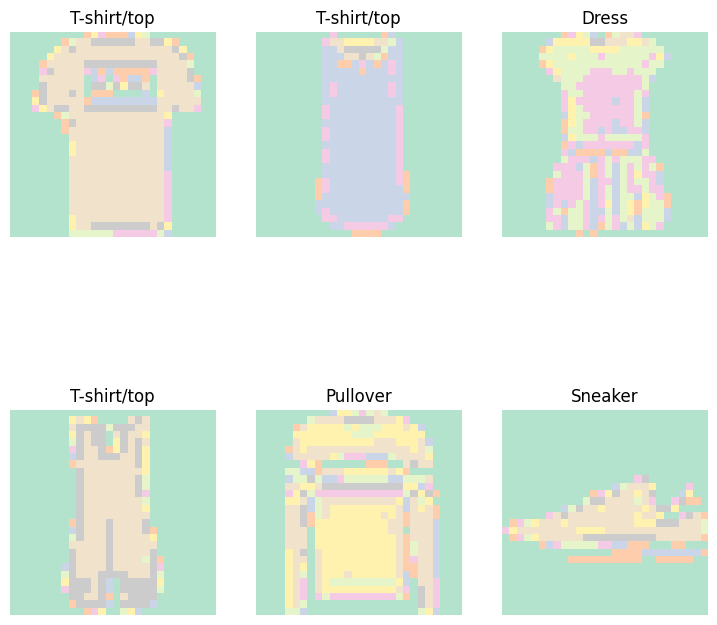

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
for i in range(1, 7):
  image, label = train_data[i]
  new_label = class_names[label]
  fig.add_subplot(2, 3, i)
  plt.imshow(image.squeeze(), cmap="Pastel2")
  plt.title(new_label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
class fashionmodel(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(
          in_channels=input_shape,
          out_channels=hidden_units,
          kernel_size=3,
          stride=1,
          padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape )
    )

  def forward(self, x : torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_2 = fashionmodel(
    input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)
).to(device)
model_2

fashionmodel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [16]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [17]:
from timeit import default_timer as timer
def print_train_time(start:float, end:float, device:torch.device=None):
  total_time = end - start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [18]:
len(train_dataloader)

1875

In [19]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_pred = model(X)
    # 2. calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    # 3. optimize the zero grade
    optimizer.zero_grad()
    # 4. loss backward
    loss.backward()
    # 5. optimizer step
    optimizer.step()

  # calculate the loss and accuracy per epoch
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} / Train accuracy: {train_acc:.2f}")

def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      # 1. forward pass
      test_pred = model(X)
      # 2. calculate the loss
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # adjust matrix
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} / Test accuracy: {test_acc:.2f}")


In [20]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step( model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)

  test_step( model_2, test_dataloader, loss_fn, accuracy_fn, device)


train_time_end_on_cpu = timer()
total_train_time_on_cpu = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_2.parameters()).device)
)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59561 / Train accuracy: 78.29
Test loss: 0.41193 / Test accuracy: 85.00
Epoch: 1
------
Train loss: 0.36475 / Train accuracy: 86.95
Test loss: 0.36193 / Test accuracy: 86.45
Epoch: 2
------
Train loss: 0.32729 / Train accuracy: 88.12
Test loss: 0.33479 / Test accuracy: 88.03
Epoch: 3
------
Train loss: 0.30572 / Train accuracy: 88.89
Test loss: 0.32144 / Test accuracy: 88.16
Epoch: 4
------
Train loss: 0.28942 / Train accuracy: 89.45
Test loss: 0.30639 / Test accuracy: 89.13
Train time on cuda:0 : 67.068 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [21]:
def make_prediction(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [22]:
import random
random.seed(15)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=5):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 7 (Sneaker)


In [23]:
test_labels

[7, 1, 0, 5, 6]

In [24]:
pred_probs = make_prediction(model_2, test_samples)
pred_classes = pred_probs.argmax(dim=1)

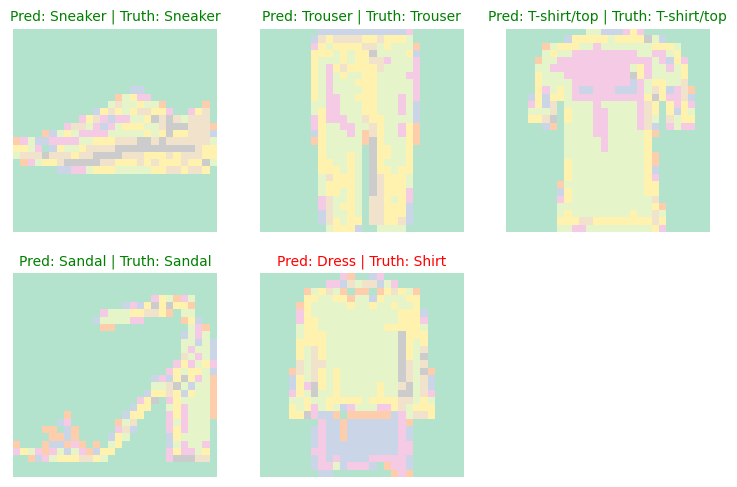

In [25]:
# Plot predictons
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="Pastel2")

  # Find the prediction label (in text form, e.g., "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g., "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change totle colour accordingly
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
    plt.title(title_text, fontsize=10, c="r") # red text if wrong

  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [26]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.2 MB/s eta 0:00:00
mlxtend version: 0.23.0


In [27]:
mlxtend.__version__

'0.23.0'

In [28]:
test_data.targets, test_data.targets.shape

(tensor([9, 2, 1,  ..., 8, 1, 5]), torch.Size([10000]))

In [29]:
def get_y_pred(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                empty_y_preds: list):
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_logit = model(X)
      y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
      empty_y_preds.append(y_pred.cpu())

  return empty_y_preds

In [35]:
y_preds = []
y_preds = get_y_pred(model_2, test_dataloader, y_preds)
y_preds[0], len(y_preds)

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5,
         1, 2, 6, 0, 9, 3, 8, 8]),
 313)

In [37]:
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor, y_pred_tensor.shape

(tensor([9, 2, 1,  ..., 0, 1, 2]), torch.Size([10000]))

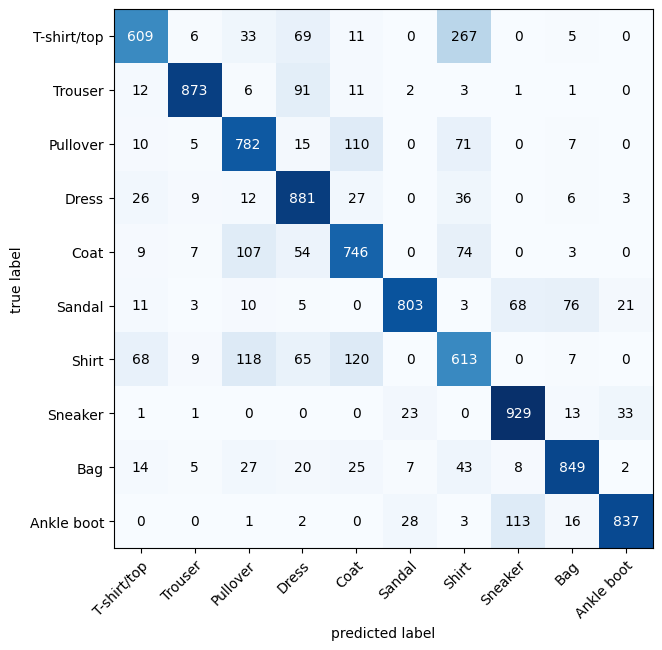

In [38]:
from torchmetrics import ConfusionMatrix
from  mlxtend.plotting import plot_confusion_matrix

# setup confusion matrix instance and compare predictions
confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
conftmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
# plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=conftmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [43]:
torch.manual_seed(15)
rand_tensor = torch.rand([1, 3, 64, 64])
rand_tensor.shape, rand_tensor

(torch.Size([1, 3, 64, 64]),
 tensor([[[[0.2973, 0.2766, 0.7974,  ..., 0.7319, 0.6628, 0.8740],
           [0.4006, 0.1980, 0.2682,  ..., 0.9576, 0.6178, 0.1713],
           [0.2471, 0.9290, 0.2497,  ..., 0.4990, 0.3756, 0.9863],
           ...,
           [0.6737, 0.0964, 0.5268,  ..., 0.9225, 0.6140, 0.7244],
           [0.3070, 0.0780, 0.5410,  ..., 0.0811, 0.5489, 0.7765],
           [0.6181, 0.9480, 0.1122,  ..., 0.0228, 0.3463, 0.9511]],
 
          [[0.7648, 0.7346, 0.6407,  ..., 0.8538, 0.0680, 0.1634],
           [0.6413, 0.1840, 0.3541,  ..., 0.1932, 0.6351, 0.8424],
           [0.4561, 0.0904, 0.1776,  ..., 0.7701, 0.5544, 0.0748],
           ...,
           [0.4548, 0.1250, 0.6095,  ..., 0.0938, 0.4390, 0.0894],
           [0.4620, 0.8680, 0.6573,  ..., 0.2601, 0.6150, 0.1218],
           [0.8371, 0.9318, 0.6717,  ..., 0.2571, 0.3164, 0.8235]],
 
          [[0.5125, 0.5577, 0.8590,  ..., 0.9748, 0.2787, 0.5277],
           [0.0724, 0.5003, 0.1934,  ..., 0.6769, 0.2212, 0.55

In [53]:
kernel_size = (3, 3)
in_channels = 3
out_channels = 3
conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size)
out = conv(rand_tensor)
out, out.shape

(tensor([[[[-0.1946, -0.1646, -0.2046,  ..., -0.5497, -0.5585, -0.1119],
           [-0.3318, -0.2510, -0.2940,  ..., -0.1692, -0.6358, -0.3708],
           [-0.4719, -0.6350, -0.4125,  ..., -0.2258, -0.3481, -0.3241],
           ...,
           [-0.2648, -0.2852, -0.2441,  ..., -0.4233, -0.1624, -0.2647],
           [-0.3967, -0.3508, -0.5493,  ..., -0.3046, -0.5677, -0.0040],
           [-0.3682, -0.6949, -0.3516,  ..., -0.3134, -0.3028, -0.2714]],
 
          [[-0.2378, -0.2277, -0.2594,  ..., -0.3926, -0.1722, -0.5332],
           [-0.3237, -0.5356, -0.0289,  ..., -0.3573, -0.1966, -0.1162],
           [-0.2423, -0.3892, -0.3137,  ..., -0.1776,  0.0666, -0.0655],
           ...,
           [-0.3103, -0.2708, -0.3191,  ..., -0.2920, -0.3736, -0.0803],
           [-0.1037, -0.3822, -0.3182,  ..., -0.3266, -0.1035, -0.4872],
           [-0.0130,  0.1472, -0.4157,  ..., -0.6287, -0.2622, -0.1908]],
 
          [[-0.0083, -0.0962, -0.1119,  ..., -0.1190, -0.0044, -0.1394],
           [-

In [54]:
kernel_size = (4, 4)
conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size)
out = conv(rand_tensor)
out, out.shape

(tensor([[[[ 0.5113,  0.1873,  0.3226,  ...,  0.1752,  0.0571,  0.6975],
           [ 0.3766,  0.2111,  0.5623,  ...,  0.3811,  0.3683,  0.3138],
           [ 0.1840,  0.4926,  0.2007,  ...,  0.5044,  0.4187,  0.4156],
           ...,
           [ 0.5003,  0.4023,  0.3492,  ...,  0.0917,  0.4687,  0.1722],
           [ 0.0221,  0.2140,  0.3057,  ...,  0.4382,  0.4036,  0.6115],
           [ 0.3081,  0.3676,  0.3197,  ...,  0.2673,  0.2743,  0.4999]],
 
          [[-0.0809, -0.6046, -0.0025,  ..., -0.2964, -0.1260, -0.5622],
           [-0.2384, -0.1411, -0.1914,  ..., -0.2511, -0.5069,  0.1639],
           [-0.5423, -0.2164, -0.2673,  ..., -0.2816, -0.0646, -0.1904],
           ...,
           [-0.5221,  0.0413, -0.1991,  ..., -0.1740, -0.3224, -0.3703],
           [-0.2512, -0.3334, -0.3843,  ..., -0.2664, -0.2369, -0.3384],
           [-0.0284, -0.1899, -0.2548,  ..., -0.1203, -0.2782, -0.2660]],
 
          [[ 0.2659,  0.3381,  0.5282,  ...,  0.1770,  0.2548,  0.0437],
           [ 

In [52]:
kernel_size = (1, 1)
conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size)
out = conv(rand_tensor)
out, out.shape

(tensor([[[[-0.4104, -0.4099, -0.6751,  ..., -0.7289, -0.3342, -0.5070],
           [-0.2926, -0.2503, -0.2201,  ..., -0.5888, -0.4168, -0.3933],
           [-0.4434, -0.4932, -0.3282,  ..., -0.5320, -0.3893, -0.5158],
           ...,
           [-0.3597, -0.2929, -0.5758,  ..., -0.6440, -0.3654, -0.3947],
           [-0.3512, -0.3167, -0.5513,  ..., -0.1740, -0.4732, -0.4094],
           [-0.6545, -0.5967, -0.2010,  ..., -0.3428, -0.3799, -0.5281]],
 
          [[-0.2377, -0.2373, -0.5369,  ..., -0.4372, -0.6431, -0.7238],
           [-0.3241, -0.3718, -0.3495,  ..., -0.7589, -0.4388, -0.1493],
           [-0.3153, -0.7743, -0.4028,  ..., -0.3409, -0.3443, -0.8087],
           ...,
           [-0.5230, -0.3427, -0.4091,  ..., -0.7765, -0.4989, -0.6692],
           [-0.3390, -0.0914, -0.3994,  ..., -0.2858, -0.4138, -0.6850],
           [-0.3832, -0.5127, -0.1676,  ..., -0.2653, -0.4074, -0.5467]],
 
          [[-0.5669, -0.5558, -0.6460,  ..., -0.7584, -0.2480, -0.3707],
           [-

In [55]:
kernel_size = (8, 8)
conv = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size)
out = conv(rand_tensor)
out, out.shape

(tensor([[[[ 0.3163,  0.0910,  0.3600,  ...,  0.3457,  0.2553, -0.0089],
           [ 0.3698,  0.1954,  0.0547,  ...,  0.5101,  0.3056,  0.1867],
           [ 0.4125,  0.2020,  0.1598,  ...,  0.1908,  0.2394,  0.1668],
           ...,
           [ 0.4180,  0.3510,  0.0957,  ...,  0.3141,  0.0444,  0.1732],
           [ 0.2646,  0.2585,  0.2464,  ...,  0.2060,  0.3223,  0.3557],
           [ 0.3167,  0.3442,  0.3947,  ...,  0.0856,  0.4835,  0.2410]],
 
          [[ 0.3595,  0.5789,  0.4852,  ..., -0.0599,  0.3095,  0.6248],
           [ 0.3279,  0.4377,  0.2825,  ...,  0.4323, -0.0954,  0.4680],
           [ 0.5355,  0.2230,  0.0703,  ...,  0.3510,  0.3159,  0.1376],
           ...,
           [ 0.1899,  0.6900,  0.4158,  ...,  0.7372,  0.3969,  0.3273],
           [ 0.4705,  0.1631,  0.0196,  ...,  0.1597,  0.2960,  0.3701],
           [ 0.4730,  0.2715,  0.1025,  ...,  0.5003,  0.2602,  0.4881]],
 
          [[ 0.5843,  0.6100,  0.5030,  ...,  0.3585,  0.2604,  0.2008],
           [ 

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?